In [49]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 

from tensorflow.keras.utils import plot_model 

from tensorflow.keras import models, layers
import tensorflow.keras as keras

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Concatenate
from tensorflow.keras.utils import plot_model 

from tensorflow.keras.datasets import cifar10

# Вариант 1. (простой)



## 1.1 Загрузка данных, разбиение на тренировочную и тестовую выборки

In [3]:
# загрузка тренировочных и тестовых данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# конвертация чисел из uint8 в float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# нормализация данных [0, 1]
x_train /= 255 
x_test /= 255 

# трансформация лейблов в one-hot encoding
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

## 1.2 Построение моделей

In [57]:
hist1 = []
for i in range(10):
  # инициализация пустой модели
  model1 = Sequential()
 
  # первый сверточный слой
  model1.add(layers.Conv2D(6, kernel_size=(7, 7), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))
  
  # второй пуллинговый слой
  model1.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
  
  # третий сверточный слой
  model1.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
  
  # четвертый пуллинговый слой
  model1.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
  
  # пятый сверточный слой
  model1.add(layers.Conv2D(120, kernel_size=(3, 3), strides=(1, 1), activation='tanh', padding='valid'))
  
  # сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
  model1.add(layers.Flatten())
  
  # шестой полносвязный слой
  model1.add(layers.Dense(84, activation='tanh'))
  
  # выходной слой с функцией активации softmax
  model1.add(layers.Dense(10, activation='softmax'))
  
  # компилияция модели
  model1.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])
  
  
  hist1.append(model1.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1))

Epoch 1/2
469/469 [==============================] - 8s 16ms/step - loss: 0.8763 - accuracy: 0.6934 - val_loss: 0.6688 - val_accuracy: 0.7356
Epoch 2/2
469/469 [==============================] - 6s 13ms/step - loss: 0.5656 - accuracy: 0.7918 - val_loss: 0.5512 - val_accuracy: 0.8007
Epoch 1/2
469/469 [==============================] - 8s 16ms/step - loss: 0.8585 - accuracy: 0.7028 - val_loss: 0.6311 - val_accuracy: 0.7693
Epoch 2/2
469/469 [==============================] - 6s 13ms/step - loss: 0.5636 - accuracy: 0.7952 - val_loss: 0.5565 - val_accuracy: 0.8024
Epoch 1/2
469/469 [==============================] - 6s 13ms/step - loss: 0.8875 - accuracy: 0.6980 - val_loss: 0.6382 - val_accuracy: 0.7684
Epoch 2/2
469/469 [==============================] - 6s 13ms/step - loss: 0.5713 - accuracy: 0.7946 - val_loss: 0.5611 - val_accuracy: 0.7911
Epoch 1/2
469/469 [==============================] - 6s 13ms/step - loss: 0.8636 - accuracy: 0.7060 - val_loss: 0.6674 - val_accuracy: 0.7480
Epoch 

In [5]:
# classes = ['T-shirt/top',	'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 
#            'Bag', 'Ankle boot']

In [6]:
# x_test.shape

In [7]:
# for i in [56, 125, 1856]:
#   N = i
#   y_p=model.predict(x_test[N:N+1][:,:,:])
#   y_t = np.argmax(y_test[N:N+1], axis = 1 )
#   y_i = np.argmax(y_p, axis = 1 )
#   # plt.imshow(x_test[N][:,:,:])
#   # plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
#   # plt.show()
#   print(('это : '+classes[y_t[0]]+', опознан как : '+classes[y_i[0]]))

In [42]:
hist2 = []
for i in range(10):
  # инициализация пустой модели
  model2 = Sequential()
  
  # первый сверточный слой
  model2.add(layers.Conv2D(6, kernel_size=(7, 7), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))
  
  # второй пуллинговый слой
  model2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))
  
  # третий сверточный слой
  model2.add(layers.Conv2D(16, kernel_size=(6, 6), strides=(1, 1), activation='tanh', padding="same"))
  
  # четвертый пуллинговый слой
  model2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
  
  # пятый сверточный слой
  model2.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="same"))
  
  # сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
  model2.add(layers.Flatten())
  
  # шестой полносвязный слой
  model2.add(layers.Dense(84, activation='tanh'))

  # выходной слой с функцией активации softmax
  model2.add(layers.Dense(10, activation='softmax'))
  
  # компилияция модели
  model2.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])
  
  
  hist2.append(model2.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1))

Epoch 1/2
469/469 [==============================] - 13s 27ms/step - loss: 0.7688 - accuracy: 0.7264 - val_loss: 0.5698 - val_accuracy: 0.7863
Epoch 2/2
469/469 [==============================] - 14s 30ms/step - loss: 0.4988 - accuracy: 0.8213 - val_loss: 0.4829 - val_accuracy: 0.8299
Epoch 1/2
469/469 [==============================] - 16s 31ms/step - loss: 0.7231 - accuracy: 0.7458 - val_loss: 0.5490 - val_accuracy: 0.8047
Epoch 2/2
469/469 [==============================] - 14s 30ms/step - loss: 0.4890 - accuracy: 0.8270 - val_loss: 0.4809 - val_accuracy: 0.8297
Epoch 1/2
469/469 [==============================] - 13s 27ms/step - loss: 0.7566 - accuracy: 0.7384 - val_loss: 0.5705 - val_accuracy: 0.7923
Epoch 2/2
469/469 [==============================] - 12s 25ms/step - loss: 0.5051 - accuracy: 0.8203 - val_loss: 0.5025 - val_accuracy: 0.8171
Epoch 1/2
469/469 [==============================] - 17s 34ms/step - loss: 0.7734 - accuracy: 0.7236 - val_loss: 0.5780 - val_accuracy: 0.7791

In [44]:
hist3 = []
for i in range(10):
  # инициализация пустой модели
  model3 = Sequential()
  
  # первый сверточный слой
  model3.add(layers.Conv2D(56, kernel_size=(7, 7), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))
  
  # второй пуллинговый слой
  model3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))
  
  # третий сверточный слой
  model3.add(layers.Conv2D(156, kernel_size=(6, 6), strides=(1, 1), activation='tanh', padding="same"))
  
  # четвертый пуллинговый слой
  model3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
  
  # пятый полносвязный слой
  model3.add(layers.Conv2D(264, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="same"))
  
  # сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
  model3.add(layers.Flatten())
  
  # шестой полносвязный слой
  model3.add(layers.Dense(84, activation='tanh'))

  # выходной слой с функцией активации softmax
  model3.add(layers.Dense(10, activation='softmax'))

  # компилияция модели
  model3.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])
  
  
  hist3.append(model3.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1))

Epoch 1/2
469/469 [==============================] - 65s 138ms/step - loss: 0.7407 - accuracy: 0.7346 - val_loss: 0.5573 - val_accuracy: 0.7958
Epoch 2/2
469/469 [==============================] - 65s 138ms/step - loss: 0.4924 - accuracy: 0.8222 - val_loss: 0.4859 - val_accuracy: 0.8295
Epoch 1/2
469/469 [==============================] - 68s 142ms/step - loss: 0.7333 - accuracy: 0.7381 - val_loss: 0.5496 - val_accuracy: 0.8000
Epoch 2/2
469/469 [==============================] - 66s 140ms/step - loss: 0.4863 - accuracy: 0.8251 - val_loss: 0.4976 - val_accuracy: 0.8153
Epoch 1/2
469/469 [==============================] - 66s 139ms/step - loss: 0.7477 - accuracy: 0.7308 - val_loss: 0.5845 - val_accuracy: 0.7760
Epoch 2/2
469/469 [==============================] - 65s 138ms/step - loss: 0.4902 - accuracy: 0.8234 - val_loss: 0.4804 - val_accuracy: 0.8291
Epoch 1/2
469/469 [==============================] - 68s 143ms/step - loss: 0.7315 - accuracy: 0.7408 - val_loss: 0.5403 - val_accuracy:

In [46]:
# инициализация пустой модели
model4 = Sequential()

# первый сверточный слой
model4.add(layers.Conv2D(56, kernel_size=(20, 20), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model4.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

# третий сверточный слой
model4.add(layers.Conv2D(156, kernel_size=(15, 15), strides=(1, 1), activation='tanh', padding="same"))

# четвертый пуллинговый слой
model4.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="same"))

# пятый сверточный слой
model4.add(layers.Conv2D(264, kernel_size=(15, 15), strides=(1, 1), activation='tanh', padding="same"))

# шестой пуллинговый слой
model4.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

# седьмой полносвязный слой
model4.add(layers.Conv2D(516, kernel_size=(10, 10), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model4.add(layers.Flatten())

# восьмой полносвязный слой
model4.add(layers.Dense(264, activation='tanh'))

# выходной слой с функцией активации softmax
model4.add(layers.Dense(10, activation='softmax'))

# компилияция модели
model4.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


hist4 = model4.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/2
469/469 [==============================] - 237s 505ms/step - loss: 0.6716 - accuracy: 0.7536 - val_loss: 0.5412 - val_accuracy: 0.7938
Epoch 2/2
469/469 [==============================] - 237s 504ms/step - loss: 0.4554 - accuracy: 0.8347 - val_loss: 0.4547 - val_accuracy: 0.8365


In [47]:
hist5 = []
for i in range(10):
  # инициализация пустой модели
  model5 = Sequential()
  
  # первый полносвязный слой
  model5.add(layers.Dense(84, activation='tanh'))
  
  # сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
  model5.add(layers.Flatten())
  
  # второй полносвязный слой
  model5.add(layers.Dense(84, activation='tanh'))
  
  # третий полносвязный слой
  model5.add(layers.Dense(84, activation='tanh'))
  
  # четвёртый полносвязный слой
  model5.add(layers.Dense(84, activation='tanh'))
  
  # пятый полносвязный слой
  model5.add(layers.Dense(84, activation='tanh'))
  
  # шестой полносвязный слой
  model5.add(layers.Dense(84, activation='tanh'))
  
  # выходной слой с функцией активации softmax
  model5.add(layers.Dense(10, activation='softmax'))
  
  # компилияция модели
  model5.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])


  hist5.append(model5.fit(x=x_train,y=y_train, epochs=2, batch_size=128, validation_data=(x_test, y_test), verbose=1))

Epoch 1/2
469/469 [==============================] - 11s 22ms/step - loss: 0.8553 - accuracy: 0.7487 - val_loss: 0.5800 - val_accuracy: 0.8019
Epoch 2/2
469/469 [==============================] - 9s 18ms/step - loss: 0.5092 - accuracy: 0.8256 - val_loss: 0.4935 - val_accuracy: 0.8267
Epoch 1/2
469/469 [==============================] - 9s 17ms/step - loss: 0.8374 - accuracy: 0.7487 - val_loss: 0.5889 - val_accuracy: 0.8002
Epoch 2/2
469/469 [==============================] - 9s 19ms/step - loss: 0.5128 - accuracy: 0.8238 - val_loss: 0.5086 - val_accuracy: 0.8184
Epoch 1/2
469/469 [==============================] - 9s 18ms/step - loss: 0.8264 - accuracy: 0.7412 - val_loss: 0.5991 - val_accuracy: 0.7898
Epoch 2/2
469/469 [==============================] - 8s 17ms/step - loss: 0.5189 - accuracy: 0.8213 - val_loss: 0.5124 - val_accuracy: 0.8199
Epoch 1/2
469/469 [==============================] - 10s 18ms/step - loss: 0.8497 - accuracy: 0.7383 - val_loss: 0.6082 - val_accuracy: 0.7971
Epoc

## 1.3 Результаты работы моделей и вывод:

In [73]:
print('Первая модель с падением размера ядра свертки и последовательностью блоков свертка-пулинг')
print('Accuracy {:.2f}%'.format(sum(h.history['accuracy'][1] for h in hist1)/len(hist1) * 100, "%"))

Первая модель с падением размера ядра свертки и последовательностью блоков свертка-пулинг
Accuracy 79.38%


In [72]:
print('Вторая модель (с увеличением размера ядер)')
print('Accuracy {:.2f}%'.format(sum(h.history['accuracy'][1] for h in hist2)/len(hist2) * 100, "%"))

Вторая модель (с увеличением размера ядер)
Accuracy 82.19%


In [74]:
print('Третья модель (с увеличением числа ядер)')
print('Accuracy {:.2f}%'.format(sum(h.history['accuracy'][1] for h in hist3)/len(hist3) * 100, "%"))

Третья модель (с увеличением числа ядер)
Accuracy 82.31%


In [78]:
print('Четвёртая модель (с увеличением числа слоёв)')
print('Accuracy {:.2f}%'.format(hist4.history['accuracy'][1]*100, "%"))

Четвёртая модель (с увеличением числа слоёв)
Accuracy 83.47%


In [79]:
print('Модель полносвязной сети')
print('Accuracy {:.2f}%'.format(sum(h.history['accuracy'][1] for h in hist5)/len(hist5) * 100, "%"))

Модель полносвязной сети
Accuracy 82.39%


### Вывод: 

Увеличение числа слоёв, ядер и размера ядер приводило к несущественному улучшению работы моделей при существенном увеличении времени вычисления. В случае, если не изменять параметр padding, увеличение числа слоёв/ядер может привести даже к ухудшению работы модели (правда, тоже не очень большому). Полносвязная сеть отработала не хуже прочих моделей и при этом довольно быстро.

Для четвёртой модели не стала строить цикл, так как по остальным моделям заметила, что результаты работы не очень сильно отклоняются от среднего, а вычислялись результаты четвёртой модели очень долго.

# Вариант 2. (сложный)

## 2.1 Загрузка данных, разбиение данных на тренировочную и тестовую выборки

In [82]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']
num_classes = 10

In [84]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


## 2.2 Построение моделей

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


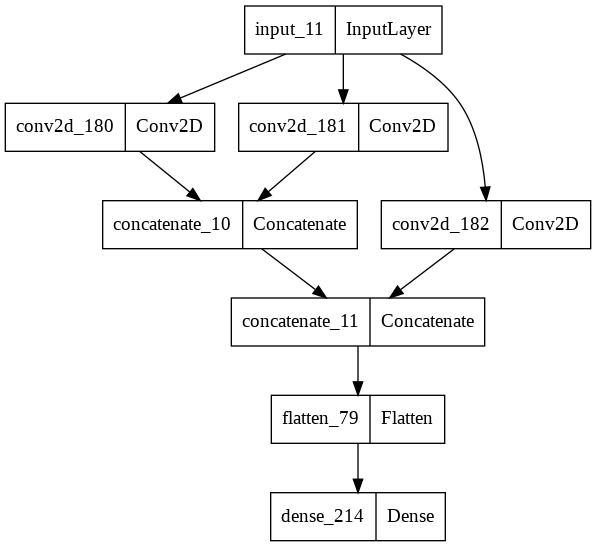

In [92]:
# сеть из трёх нитей:

first_input = Input(shape=(32,32,3))
x11= Conv2D(10,3,activation='relu',padding = 'same')(first_input)
first_dense = x11# Dense(10, )(x11)

x22= Conv2D(16,5,activation='relu',padding = 'same')(first_input)
second_dense = x22

merge_one = Concatenate(   )([first_dense, second_dense])

third_input = Input(shape=(32,32,3))
x33= Conv2D(10,1,activation='relu',padding = 'same')(first_input)

merge_two = Concatenate( axis=-1)([merge_one, x33])
merge_two= Flatten()(merge_two)
merge_two=Dense(10, activation='softmax')(merge_two)

model_stek = Model(inputs=first_input, outputs=merge_two)

ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

plot_model(model_stek,'model_stek.png')

In [98]:
hist21 = model_stek.fit(x_train,y_train, epochs = 5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9612 - accuracy: 0.6685 - val_loss: 1.2334 - val_accuracy: 0.5780
Epoch 2/5
1563/1563 [==============================] - 18s 12ms/step - loss: 0.9070 - accuracy: 0.6898 - val_loss: 1.2130 - val_accuracy: 0.5860
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8620 - accuracy: 0.7019 - val_loss: 1.2822 - val_accuracy: 0.5643
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8243 - accuracy: 0.7137 - val_loss: 1.2497 - val_accuracy: 0.5846
Epoch 5/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7872 - accuracy: 0.7306 - val_loss: 1.2912 - val_accuracy: 0.5800


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


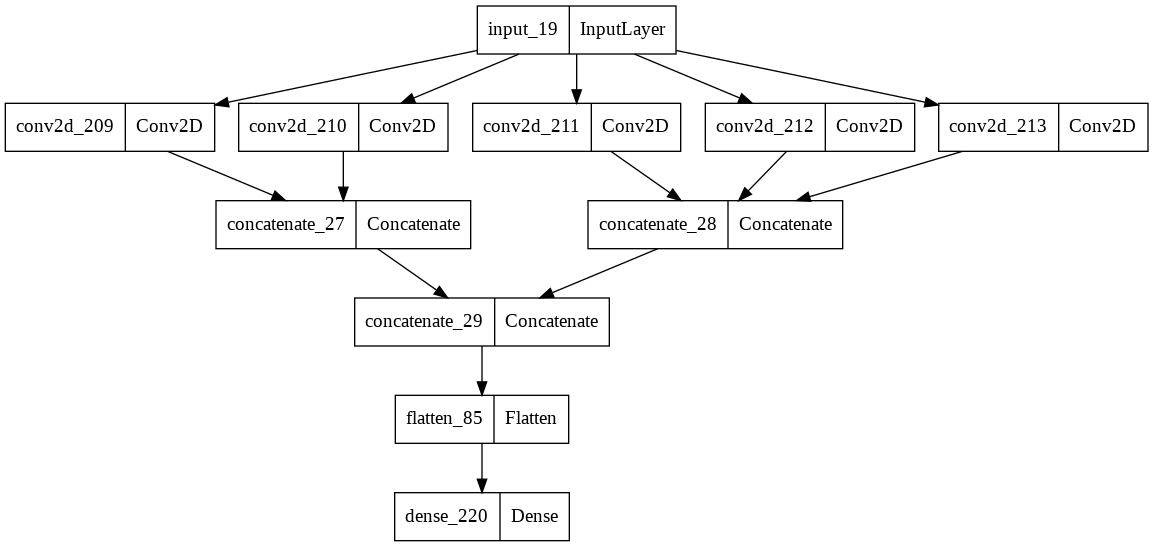

In [112]:
# сеть из пяти нитей:

first_input = Input(shape=(32,32,3))
x11= Conv2D(10,3,activation='relu',padding = 'same')(first_input)
first_dense = x11
x22= Conv2D(16,5,activation='relu',padding = 'same')(first_input)
second_dense = x22

merge_one = Concatenate(   )([first_dense, second_dense])

x33= Conv2D(10,1,activation='relu',padding = 'same')(first_input)
third_dense = x33
x44= Conv2D(10,1,activation='relu',padding = 'same')(first_input)
fourth_dense = x44
x55= Conv2D(10,1,activation='relu',padding = 'same')(first_input)
fifth_dense = x55

merge_two = Concatenate(   )([third_dense, fourth_dense, fifth_dense])

final_merge = Concatenate( axis=-1)([merge_one, merge_two])
final_merge = Flatten()(final_merge)
final_merge = Dense(10, activation='softmax')(final_merge)

model_stek = Model(inputs=first_input, outputs=final_merge)

ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

plot_model(model_stek,'model_stek.png')

In [103]:
hist22 = model_stek.fit(x_train,y_train, epochs = 5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7534 - accuracy: 0.7395 - val_loss: 1.2881 - val_accuracy: 0.5835
Epoch 2/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7219 - accuracy: 0.7532 - val_loss: 1.3413 - val_accuracy: 0.5770
Epoch 3/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6922 - accuracy: 0.7636 - val_loss: 1.2972 - val_accuracy: 0.5846
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6662 - accuracy: 0.7731 - val_loss: 1.2855 - val_accuracy: 0.5862
Epoch 5/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6408 - accuracy: 0.7823 - val_loss: 1.2926 - val_accuracy: 0.5895


In [106]:
# сеть из пяти нитей с большим, чем в предыдущих моделях, количеством ядер:

first_input = Input(shape=(32,32,3))
x11= Conv2D(16,3,activation='relu',padding = 'same')(first_input)
first_dense = x11
x22= Conv2D(20,5,activation='relu',padding = 'same')(first_input)
second_dense = x22

merge_one = Concatenate(   )([first_dense, second_dense])

x33= Conv2D(16,1,activation='relu',padding = 'same')(first_input)
third_dense = x33
x44= Conv2D(16,1,activation='relu',padding = 'same')(first_input)
fourth_dense = x44
x55= Conv2D(20,1,activation='relu',padding = 'same')(first_input)
fifth_dense = x55

merge_two = Concatenate(   )([third_dense, fourth_dense, fifth_dense])

final_merge = Concatenate( axis=-1)([merge_one, merge_two])
final_merge = Flatten()(final_merge)
final_merge = Dense(10, activation='softmax')(final_merge)

model_stek = Model(inputs=first_input, outputs=final_merge)

ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# plot_model(model_stek,'model_stek.png')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [109]:
hist23 = model_stek.fit(x_train,y_train, epochs = 5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2056 - accuracy: 0.5781 - val_loss: 1.3642 - val_accuracy: 0.5164
Epoch 2/5
1563/1563 [==============================] - 20s 12ms/step - loss: 1.1738 - accuracy: 0.5861 - val_loss: 1.3710 - val_accuracy: 0.5115
Epoch 3/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1469 - accuracy: 0.5971 - val_loss: 1.3441 - val_accuracy: 0.5308
Epoch 4/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1234 - accuracy: 0.6074 - val_loss: 1.3609 - val_accuracy: 0.5188
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0906 - accuracy: 0.6188 - val_loss: 1.4086 - val_accuracy: 0.5165


In [117]:
# сеть из пяти нитей с большим, чем в предыдущих моделях, количеством слоёв:

first_input = Input(shape=(32,32,3))
x11= Conv2D(10,3,activation='relu',padding = 'same')(first_input)
x11= Conv2D(10,3,activation='relu',padding = 'same')(x11)
x11= Conv2D(10,3,activation='relu',padding = 'same')(x11)
x11= Conv2D(10,3,activation='relu',padding = 'same')(x11)
first_dense = x11
x22= Conv2D(16,5,activation='relu',padding = 'same')(first_input)
x22= Conv2D(16,5,activation='relu',padding = 'same')(x22)
x22= Conv2D(16,5,activation='relu',padding = 'same')(x22)
second_dense = x22

merge_one = Concatenate(   )([first_dense, second_dense])

x33= Conv2D(10,1,activation='relu',padding = 'same')(first_input)
x33= Conv2D(10,1,activation='relu',padding = 'same')(x33)
x33= Conv2D(10,1,activation='relu',padding = 'same')(x33)
third_dense = x33
x44= Conv2D(10,1,activation='relu',padding = 'same')(first_input)
fourth_dense = x44
x55= Conv2D(10,1,activation='relu',padding = 'same')(first_input)
fifth_dense = x55

merge_two = Concatenate(   )([third_dense, fourth_dense, fifth_dense])

final_merge = Concatenate( axis=-1)([merge_one, merge_two])
final_merge = Flatten()(final_merge)
final_merge = Dense(10, activation='softmax')(final_merge)

model_stek = Model(inputs=first_input, outputs=final_merge)

ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [118]:
hist24 = model_stek.fit(x_train,y_train, epochs = 5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 32s 19ms/step - loss: 2.3671 - accuracy: 0.3897 - val_loss: 1.6742 - val_accuracy: 0.4097
Epoch 2/5
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5384 - accuracy: 0.4674 - val_loss: 1.5504 - val_accuracy: 0.4453
Epoch 3/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4380 - accuracy: 0.5046 - val_loss: 1.4587 - val_accuracy: 0.4844
Epoch 4/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.3733 - accuracy: 0.5271 - val_loss: 1.4042 - val_accuracy: 0.5105
Epoch 5/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.3045 - accuracy: 0.5491 - val_loss: 1.3250 - val_accuracy: 0.5430


## 2.3 Результаты и вывод

In [100]:
print('Модель с тремя нитями')
print('Accuracy {:.2f}%'.format(hist21.history['accuracy'][1]*100, "%"))

Модель с тремя нитями
Accuracy 68.98%


In [104]:
print('Модель с пятью нитями')
print('Accuracy {:.2f}%'.format(hist22.history['accuracy'][1]*100, "%"))

Модель с пятью нитями
Accuracy 75.32%


In [110]:
print('Модель с пятью нитями и увеличенным количеством ядер')
print('Accuracy {:.2f}%'.format(hist23.history['accuracy'][1]*100, "%"))

Модель с пятью нитями и увеличенным количеством ядер
Accuracy 58.61%


In [121]:
print('Модель с пятью нитями и увеличенным количеством слоёв')
print('Accuracy {:.2f}%'.format(hist24.history['accuracy'][1]*100, "%"))

Модель с пятью нитями и увеличенным количеством слоёв
Accuracy 46.74%


#### Вывод:

Увеличение количества нитей повысило точность работы сетей, увеличение количества ядер и слоёв при количетсве нитей, равном пяти, точность сетей понизило.